# Математическая статистика

In [1]:
import numpy as np
import scipy.stats as sps
import ipywidgets as widgets
import matplotlib.pyplot as plt

%matplotlib inline

**Задача.** Получение и визуализация выборки заданного дискретного и непрерывного распределения 

<i>Шаг 1</i> 

Из списка дискретных случайных величин и непрерывных выберите случайные величины с номером $N$. 

In [2]:
N = 14 # номер в группе
variants = np.array([1, 4, 6, 7, 12, 27, 28, 29.5, 30, 31.9, 32, 39, 39.1, 39.2, 39.3, 39.4, 40, 41, 42, 50])
freq = np.array([2, 3, 4, 5, 6, 7, 7, 5, 6, 7, 8, 10, 25, 1, 1, 1, 1, 1, 4, 1]) / 105

print('Сумма частот: ', sum(freq), ', что не равно 1 из-за дискретности ЭВМ, поэтому далее будет выполнена нормализация')

Сумма частот:  0.9999999999999997 , что не равно 1 из-за дискретности ЭВМ, поэтому далее будет выполнена нормализация


Визуализируем входные данные:

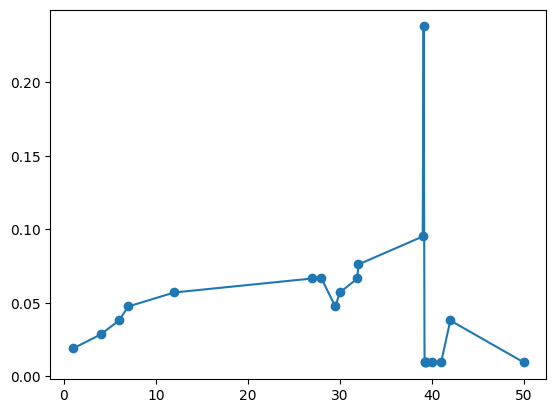

{1.0: 0.01904761904761905,
 4.0: 0.02857142857142857,
 6.0: 0.0380952380952381,
 7.0: 0.047619047619047616,
 12.0: 0.05714285714285714,
 27.0: 0.06666666666666667,
 28.0: 0.06666666666666667,
 29.5: 0.047619047619047616,
 30.0: 0.05714285714285714,
 31.9: 0.06666666666666667,
 32.0: 0.0761904761904762,
 39.0: 0.09523809523809523,
 39.1: 0.23809523809523808,
 39.2: 0.009523809523809525,
 39.3: 0.009523809523809525,
 39.4: 0.009523809523809525,
 40.0: 0.009523809523809525,
 41.0: 0.009523809523809525,
 42.0: 0.0380952380952381,
 50.0: 0.009523809523809525}

In [3]:
table = dict(zip(variants, freq))
plt.plot(variants, freq, '-o')
plt.show()
table

<i>Шаг 2</i>

Для данных случайных величин, как в примере в конце практикума, создайте функцию распределения вашей случайной величины (если необходимо).

In [4]:
freq_norm = tuple(p / sum(freq) for p in freq) # трюк, чтобы сумма все же была равна единице
distribution = sps.rv_discrete(name = 'distribution', values = (variants, freq_norm))

<i>Шаг 3</i>

Создайте выборку длины 100 для вашей случайной величины. Напечатайте массив частот и массив вариант (см. пример в конце этого документа).

In [5]:
sample = distribution.rvs(size = 100)

In [6]:
sample

array([39.1, 39.1, 39.1, 28. , 29.5, 42. ,  7. ,  6. , 30. , 39.1, 32. ,
       31.9, 30. , 28. , 31.9, 29.5, 28. , 27. , 39.1, 30. , 28. , 31.9,
       31.9, 29.5, 32. , 12. , 12. , 42. , 32. , 12. , 39. , 28. , 29.5,
       39.1, 32. , 28. , 29.5, 39.1, 32. , 39.1, 39.1, 32. ,  7. , 39. ,
       39.1, 29.5, 31.9, 30. , 32. , 28. , 28. , 28. , 39.1,  4. , 32. ,
       39.1, 42. , 30. , 40. , 12. , 40. , 28. , 41. ,  1. , 28. , 28. ,
       28. , 39. , 39.2, 12. , 29.5, 28. , 39.1, 12. , 39.1, 29.5, 31.9,
       42. , 29.5, 39.2, 28. , 30. , 39.1, 30. , 39.1, 39.1, 31.9,  7. ,
       39.1,  1. ,  6. , 39. ,  4. , 27. , 39.1, 39. , 39.1, 39.1, 31.9,
       39. ])

In [7]:
variants

array([ 1. ,  4. ,  6. ,  7. , 12. , 27. , 28. , 29.5, 30. , 31.9, 32. ,
       39. , 39.1, 39.2, 39.3, 39.4, 40. , 41. , 42. , 50. ])

<i>Шаг 4</i>

Опишите вашу выборку: объем,экстремальные статистики, медиана, мода, размах, среднее, дисперсия, эксцесс и асимметрия. Сравните с результатами калькуляции функциями из пакета Stats https://docs.scipy.org/doc/scipy/reference/stats.html

<i>Шаг 5</i>

Создайте полигон частот и гистограмму для каждой выборки


Counter({39.1: 21, 28.0: 15, 29.5: 9, 32.0: 8, 31.9: 8, 30.0: 7, 12.0: 6, 39.0: 6, 42.0: 4, 7.0: 3, 6.0: 2, 27.0: 2, 4.0: 2, 40.0: 2, 1.0: 2, 39.2: 2, 41.0: 1})


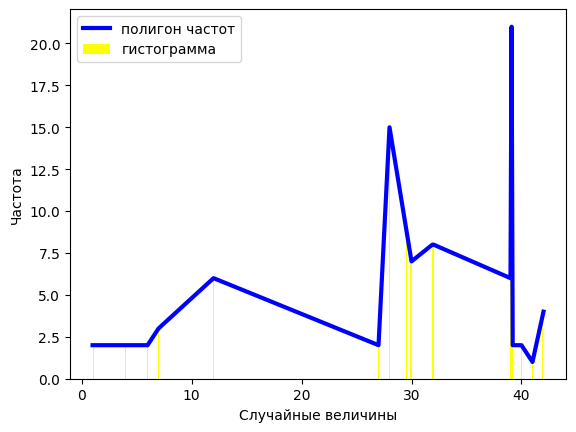

In [8]:
from collections import Counter
from collections import OrderedDict

counter = Counter(sample)

print(counter)

oredered = OrderedDict(sorted(counter.items(), key = lambda t: t[0]))

freq = list(oredered.values())
variants = list(oredered.keys())

plt.figure()
plt.plot(variants, freq, color = 'blue', lw = 3, label = 'полигон частот')
plt.hist(sample, 400, color = 'yellow', label = 'гистограмма')
plt.legend()

plt.xlabel('Случайные величины')
plt.ylabel('Частота')

plt.show()